Exploring the image processing and various thresholding techniques for image segmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import invert
from skimage.morphology import square
from skimage import exposure, morphology
from sklearn.metrics import jaccard_score
from skimage import io, data, img_as_ubyte, img_as_float, exposure
from skimage.filters import gaussian, laplace, rank, threshold_otsu, threshold_multiotsu
from scipy.ndimage import convolve, gaussian_filter, median_filter, sobel
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# loading image to explore preprocessing and segmentation
im = io.imread('C:/Users/hamma/Desktop/Newcastle University/Data Science/Image Informatics/Project/cells/cytoplasm/IM/AS_09125_050116000001_A24f00d0_slice1_channel3.tif')

# loading and inverting the image mask (ground truth)
gt = invert(io.imread('C:/Users/hamma/Desktop/Newcastle University/Data Science/Image Informatics/Project/cells/cytoplasm/GT/AS_09125_050116000001_A24f00d0_slice1_channel3.tif'))

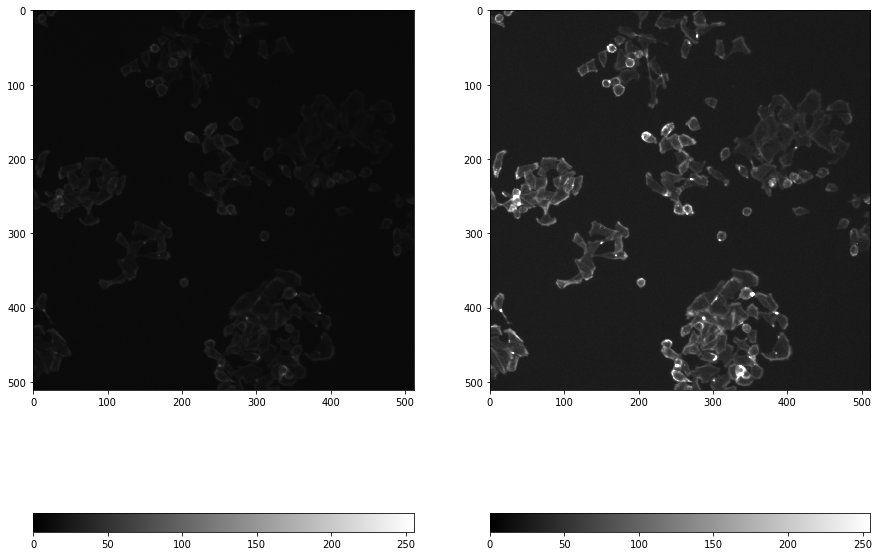

In [195]:
# image exponential transformation

im = im.astype(np.float)
a = 0.04
c = 255 / (np.log(1 + np.abs(im.max())))
imexp = c * (np.power(1 + a, im) - 1)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imexp, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

In [63]:
imexp.dtype

dtype('float64')

uint8


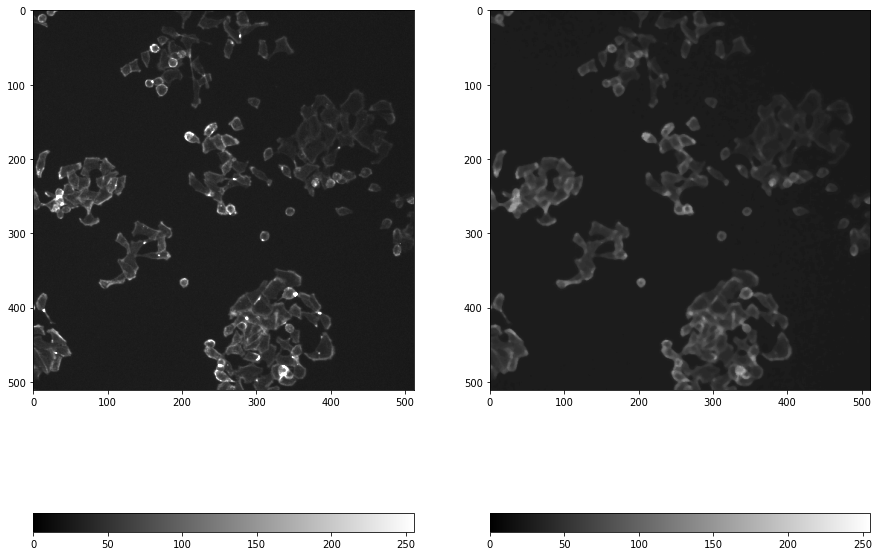

In [196]:
# exponential image median filtering

im_noi = imexp.astype(np.uint8)
print(im_noi.dtype)
se = square(5)
im_denoi = rank.median(im_noi, footprint=se)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(imexp, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_denoi, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

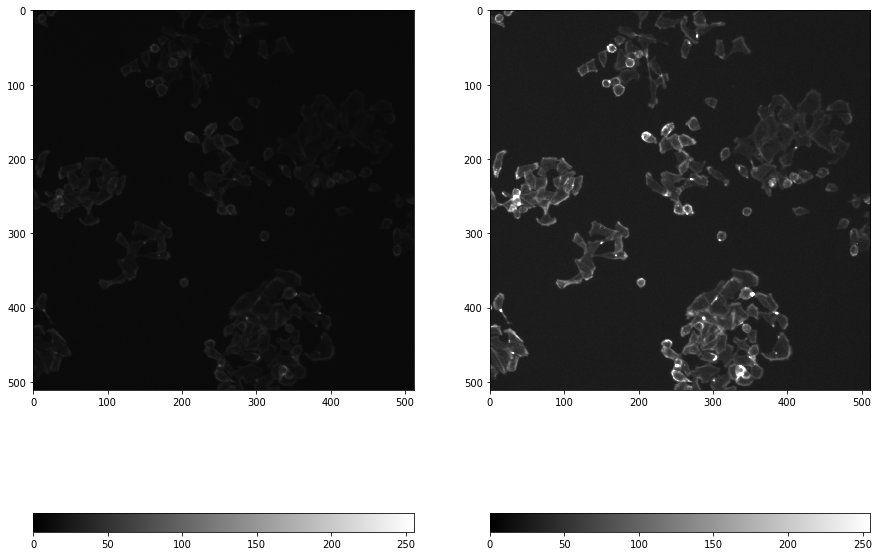

In [197]:
# image log transformation

im = im.astype(np.float)
a = 0.04
c = 255 / (np.log(1 + np.abs(im.max())))
imexp = c * (np.power(1 + a, im) - 1)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imexp, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

Diret exponentiation improves the dynamic range of the image and visually helps better differentiate between cell parts and the background.

In [202]:
print(im.min())

print(im.max())

8
122


In [3]:
# normalizing the image intensity
im = io.imread('C:/Users/hamma/Desktop/Newcastle University/Data Science/Image Informatics/Project/cells/cytoplasm/IM/AS_09125_050116000001_A24f00d0_slice1_channel3.tif')
img_cont = exposure.rescale_intensity(im)

print(img_cont.min())
print(img_cont.max())

print((img_cont**1.5).astype(np.uint8).max())

0
255
252


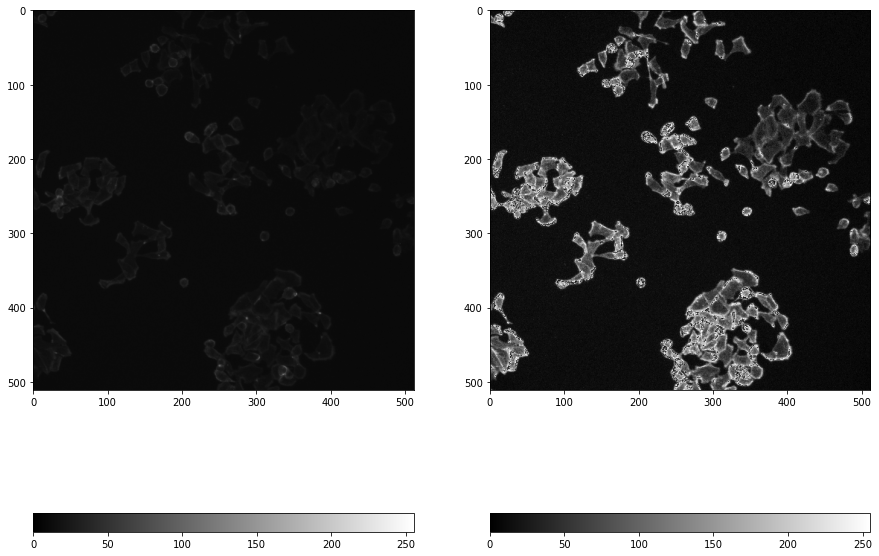

In [89]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow((img_cont**1.5).astype(np.uint8), cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

In [72]:
# intensity adjusted image gamma transformation
img_gamma_adj = exposure.adjust_gamma(img_cont, 0.6)

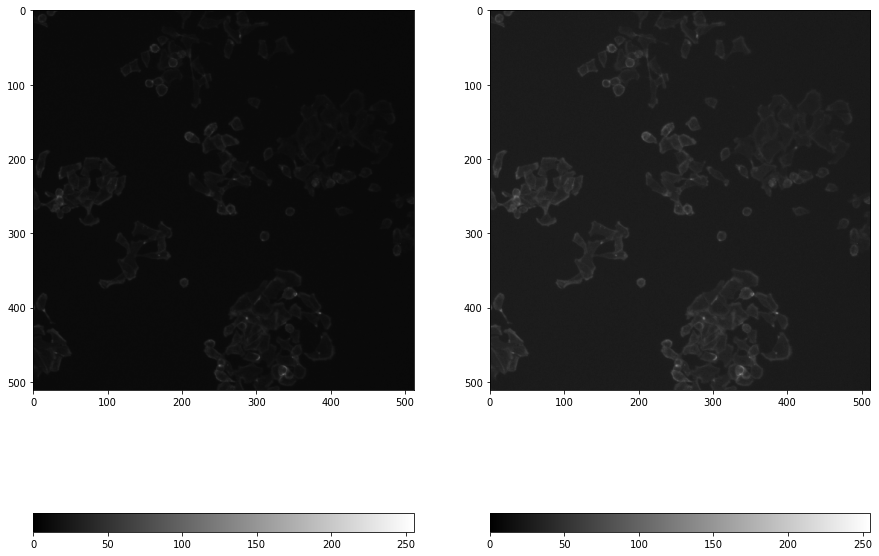

In [73]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(img_gamma_adj, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

In [64]:
img_gamma_adj.mean()

32.188053131103516

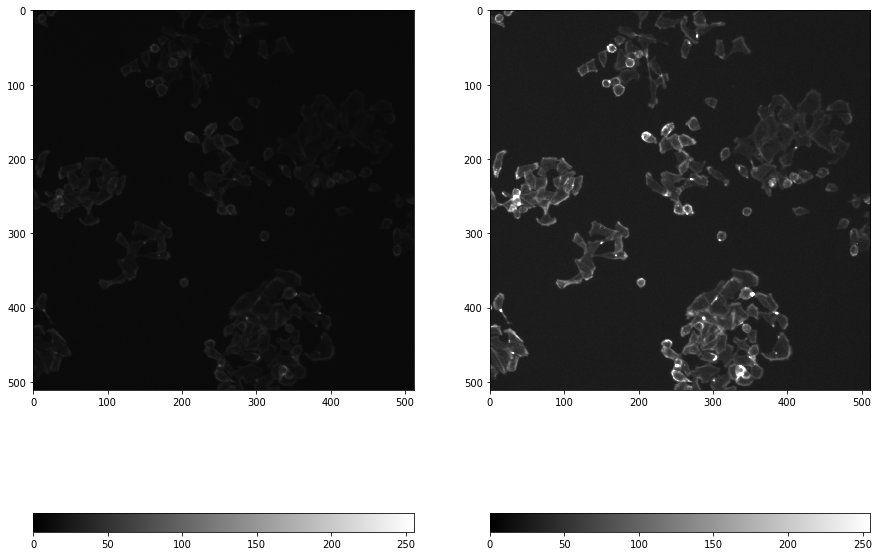

In [204]:
im = io.imread('C:/Users/hamma/Desktop/Newcastle University/Data Science/Image Informatics/Project/cells/cytoplasm/IM/AS_09125_050116000001_A24f00d0_slice1_channel3.tif')

im = im.astype(np.float)
a = 0.04
c = 255 / (np.log(1 + np.abs(im.max())))
imexp = c * (np.power(1 + a, im) - 1)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imexp, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

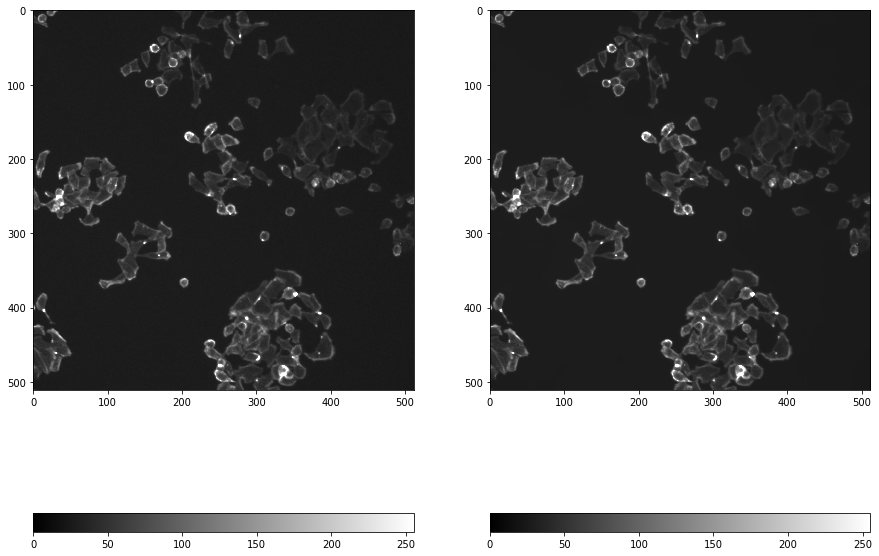

In [207]:
# image denoising using bilateral filtering
# channel axis = None because grayscale image, otherwise specify channel axis i.e. which index of the shape tuple represents the channel
sigma_est = np.mean(estimate_sigma(imexp, channel_axis=None))
imd = denoise_nl_means(imexp, h=0.6 * sigma_est, sigma=sigma_est, fast_mode=True)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(imexp, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imd, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

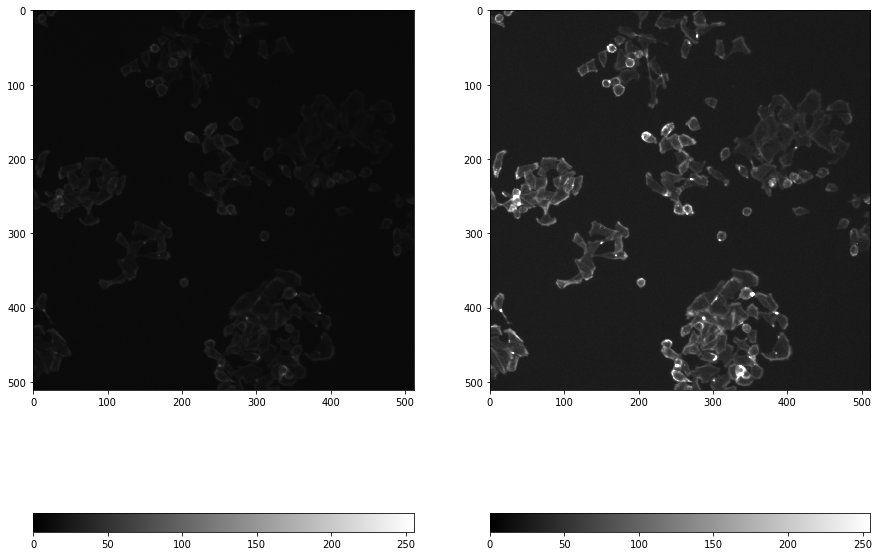

In [208]:
# reloading image to check the effect of histogram adjustments pre and post exponential transformation
im = io.imread('C:/Users/hamma/Desktop/Newcastle University/Data Science/Image Informatics/Project/cells/cytoplasm/IM/AS_09125_050116000001_A24f00d0_slice1_channel3.tif')

im = im.astype(np.float)
a = 0.04
c = 255 / (np.log(1 + np.abs(im.max())))
imexp = c * (np.power(1 + a, im) - 1)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imexp, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

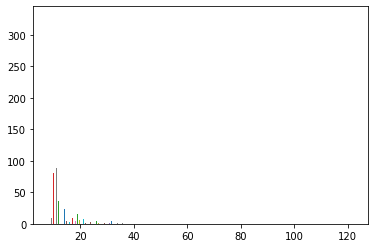

In [94]:
ax = plt.hist(im, bins = 256)
plt.show()

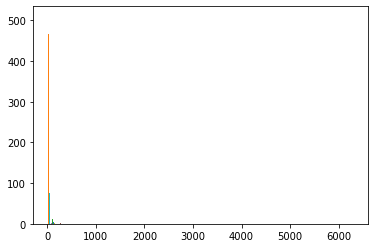

In [95]:
ax = plt.hist(imexp, bins = 256)
plt.show()

Contrast Stretching

In [209]:
r1 = 100
s1 = 50
r2 = 150
s2 = 200
imf = im.copy()
for i in range(im.shape[0]):
  for j in range(im.shape[1]):
    v = im[i][j]
    #if(0 <= v and v <= r1):
    if(v >= 0 and v <= r1):
      imf[i][j] = (s1/r1 * v)
    elif(r1 < v and v <= r2):
      imf[i][j] = ((s2 - s1)/(r2 - r1)) * (v - r1) + s1
    elif(r2 < v and v <= 255):
      imf[i][j] = ((255 - s2)/(255 - r2)) * (v - r2) + s2
v = np.concatenate(imf)

In [210]:
r1 = 100
s1 = 50
r2 = 150
s2 = 200
imd = imexp.copy()
for i in range(im.shape[0]):
  for j in range(im.shape[1]):
    v = im[i][j]
    #if(0 <= v and v <= r1):
    if(v >= 0 and v <= r1):
      imf[i][j] = (s1/r1 * v)
    elif(r1 < v and v <= r2):
      imf[i][j] = ((s2 - s1)/(r2 - r1)) * (v - r1) + s1
    elif(r2 < v and v <= 255):
      imf[i][j] = ((255 - s2)/(255 - r2)) * (v - r2) + s2
v1 = np.concatenate(imf)

In [211]:
v

9.0

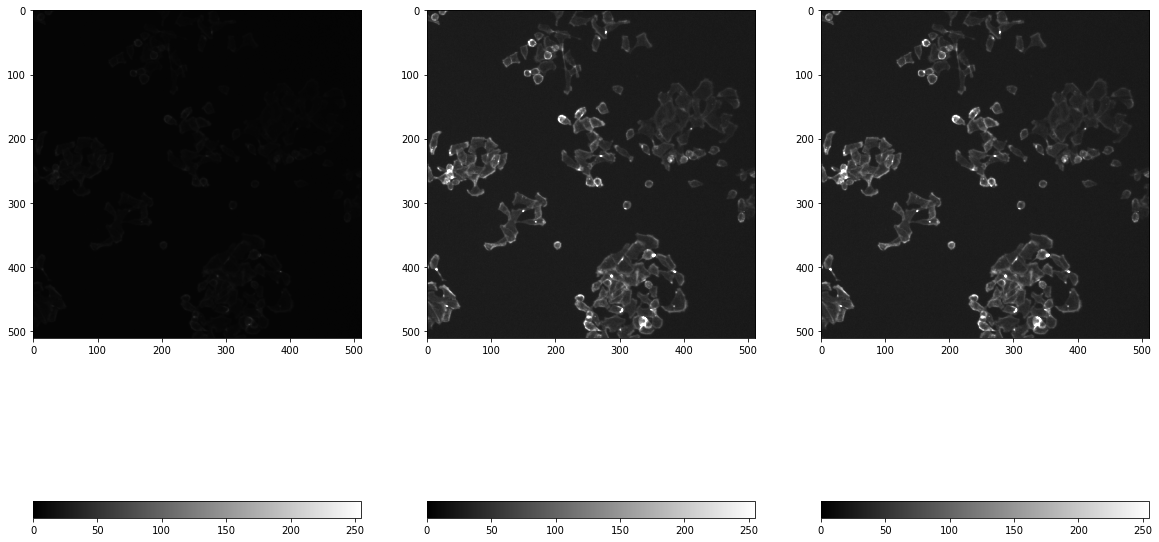

In [213]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(imf, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(imexp, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(imd, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

Histogram equalization

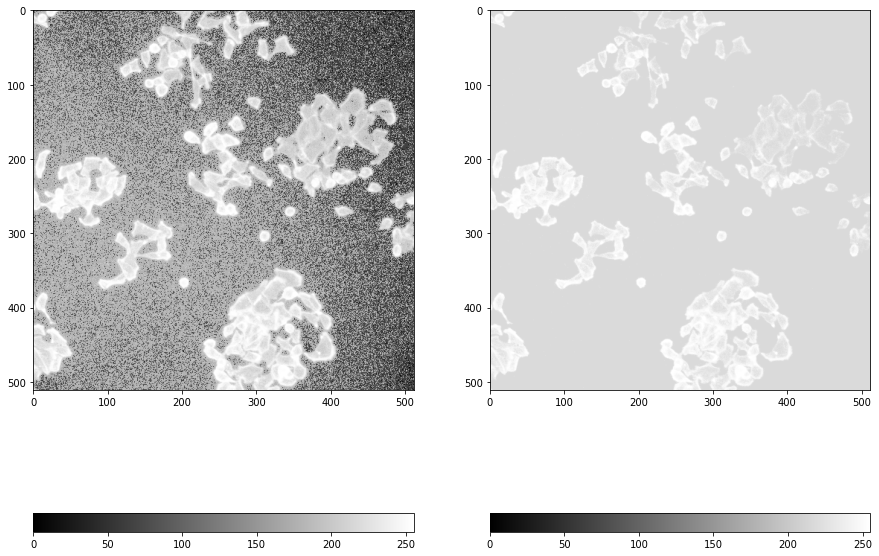

In [214]:
pre_exp_eq = equalize_hist(im)
pre_exp_eq = img_as_ubyte(pre_exp_eq)

post_exp_eq = equalize_hist(imexp)
post_exp_eq = img_as_ubyte(post_exp_eq)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(pre_exp_eq, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(post_exp_eq, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

Histogram matching

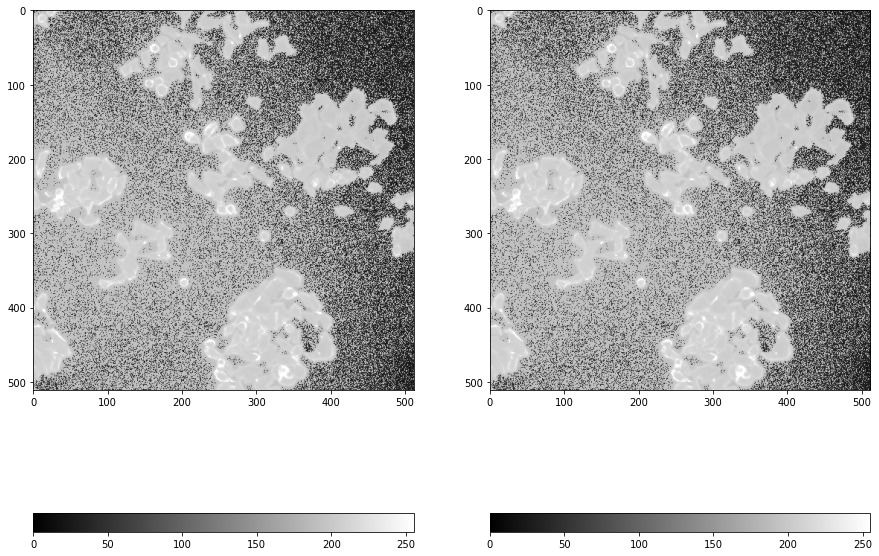

In [216]:
imr = data.camera()
pre_exp_match = match_histograms(im, imr)
post_exp_match = match_histograms(imd, imr)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(pre_exp_match, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(post_exp_match, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

Segmentation

Basic Thresholding

14.859540026626561
15.671527027233196
16.221447856377985
16.69752739248613
16.69752739248613


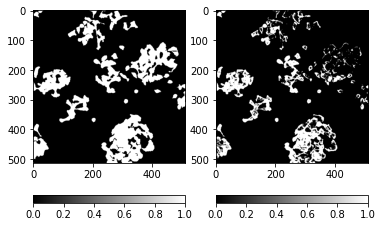

In [175]:
#thresholding on the original image

v = np.concatenate(im)
t = v.mean()
d = np.inf
ds = 0.1
while d > ds:
  g1 = v[v>t]
  g2 = v[v<=t]
  m1 = g1.mean()
  m2 = g2.mean()
  tp = (m1 + m2)/2
  d = np.abs(t - tp)
  t = tp
  print(t)

imt = im > t

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [176]:
jaccard_score(imt, gt, average='micro')

0.6179401993355482

77.7029079097885
102.72879096549377
113.84708361167426
124.26355948349506
135.7977169285698
149.20232376703873
149.20232376703873


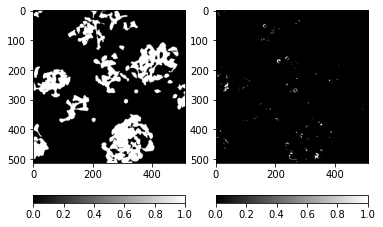

In [177]:
#thresholding on the exp image

v = np.concatenate(img_cont**1.5)
t = v.mean()
d = np.inf
ds = 0.1
while d > ds:
  g1 = v[v>t]
  g2 = v[v<=t]
  m1 = g1.mean()
  m2 = g2.mean()
  tp = (m1 + m2)/2
  d = np.abs(t - tp)
  t = tp
  print(t)

imt = imexp > t

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

42.07788278966794
45.11639639324076
45.11639639324076


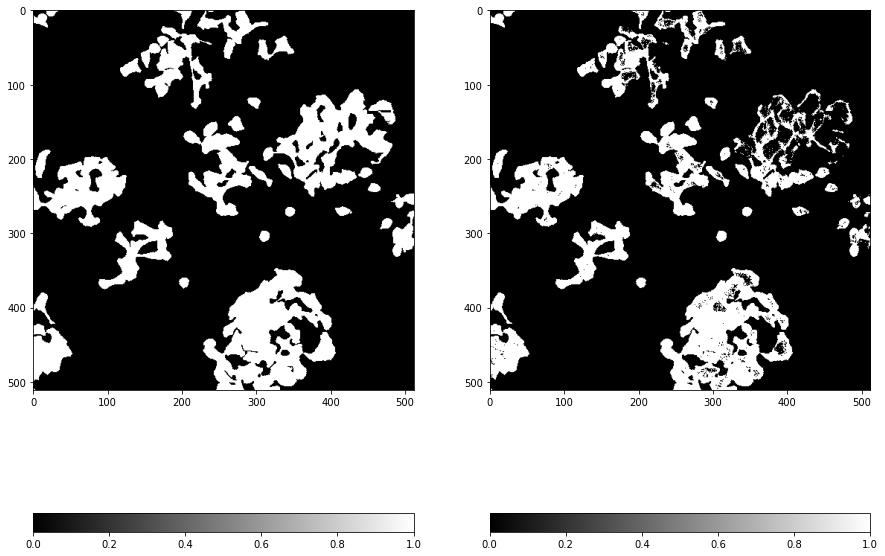

In [76]:
#thresholding on the gamma adj image
im = io.imread('C:/Users/hamma/Desktop/Newcastle University/Data Science/Image Informatics/Project/cells/cytoplasm/IM/AS_09125_050116000001_A24f00d0_slice1_channel3.tif')
img_cont = exposure.rescale_intensity(im)

img_gamma_adj = exposure.adjust_gamma(img_cont, 0.6)

v = np.concatenate(img_gamma_adj)
t = v.mean()
d = np.inf
ds = 0.1
while d > ds:
  g1 = v[v>t]
  g2 = v[v<=t]
  m1 = g1.mean()
  m2 = g2.mean()
  tp = (m1 + m2)/2
  d = np.abs(t - tp)
  t = tp
  print(t)

imt = img_gamma_adj > t

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [77]:
jaccard_score(imt, gt, average='micro')

0.838368723126172

55.74791562654162
65.9751973892881
72.47913985859583
78.151588423931
78.15278114811281


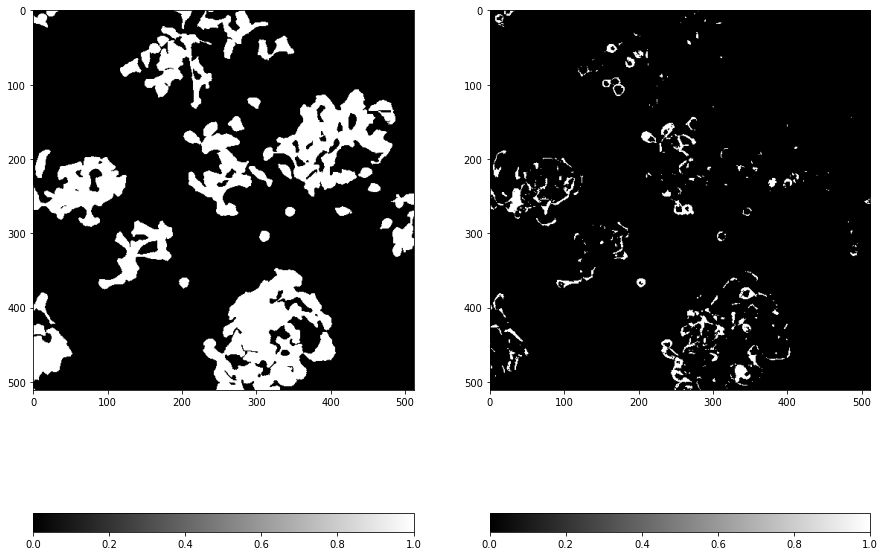

In [92]:
#thresholding on the exposure corrected image
im = io.imread('C:/Users/hamma/Desktop/Newcastle University/Data Science/Image Informatics/Project/cells/cytoplasm/IM/AS_09125_050116000001_A24f00d0_slice1_channel3.tif')
img_cont = exposure.rescale_intensity(im)

v = np.concatenate((img_cont**1.5).astype(np.uint8))
t = v.mean()
d = np.inf
ds = 0.1
while d > ds:
  g1 = v[v>t]
  g2 = v[v<=t]
  m1 = g1.mean()
  m2 = g2.mean()
  tp = (m1 + m2)/2
  d = np.abs(t - tp)
  t = tp
  print(t)

imt = img_gamma_adj > t

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [ ]:
jaccard_score(imt, gt, average='micro')

16


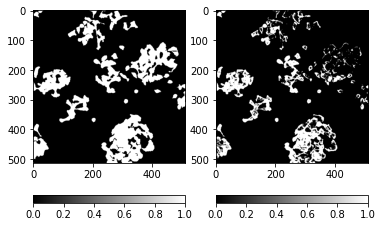

In [178]:
# otsu thresholding

t = threshold_otsu(im)
print(t)
imt = im > t

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [179]:
jaccard_score(imt, gt, average='micro')

0.6179401993355482

17.528502059245938


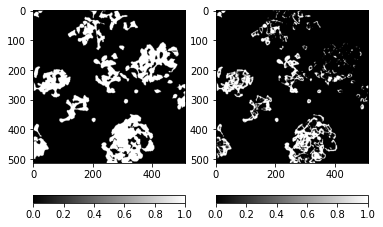

In [189]:
t = threshold_otsu(img_cont**1.001)
print(t)
imt = im > t

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [190]:
jaccard_score(imt, gt, average='micro')

0.5119728072007748

46


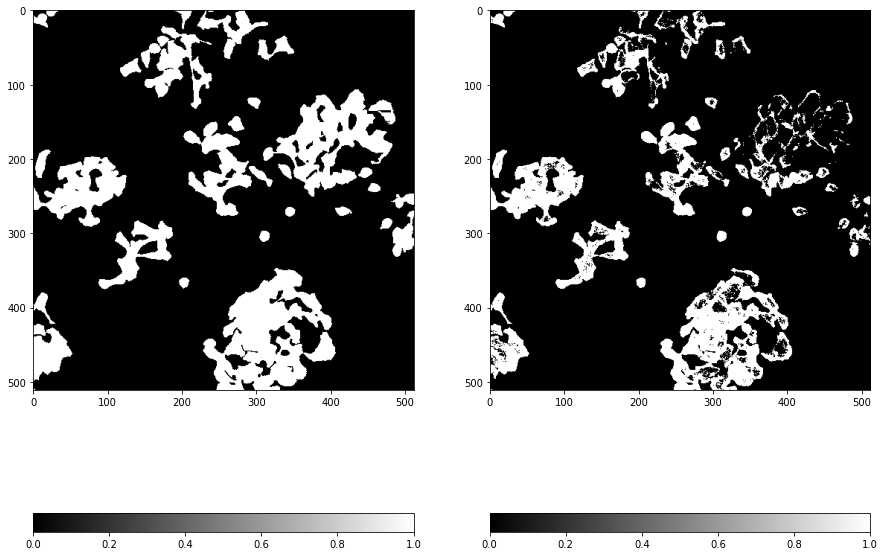

In [85]:
# otsu thresholding on gamma adjusted image

t = threshold_otsu(img_gamma_adj)
print(t)
imt = img_gamma_adj > t

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [79]:
jaccard_score(imt, gt, average='micro')

0.7131771179205009

151.11024531805177


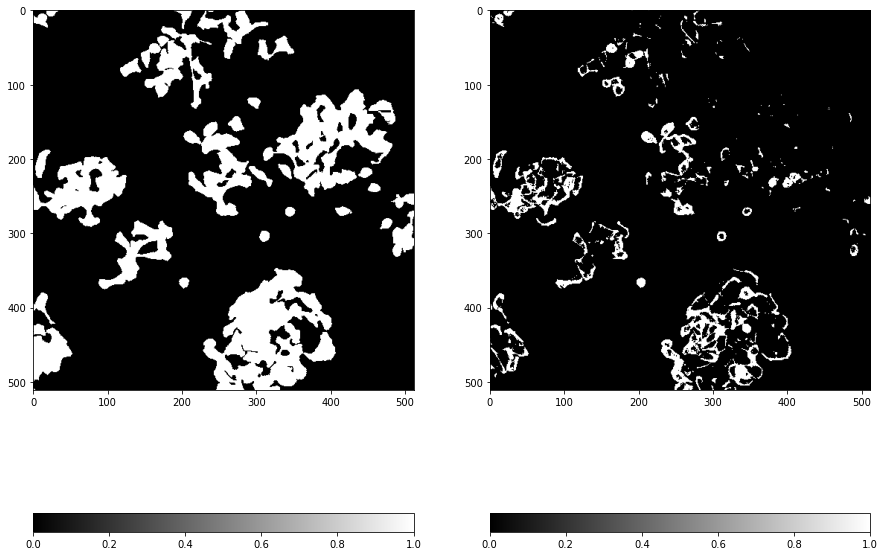

In [98]:
# otsu thresholding on contrast adjusted image

t = threshold_otsu(img_cont**1.5)
print(t)
imt = img_cont**1.5 > t

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [99]:
jaccard_score(imt, gt, average='micro')

0.2976565763986479

Sigma adjustments

In [106]:
im = io.imread('C:/Users/hamma/Desktop/Newcastle University/Data Science/Image Informatics/Project/cells/cytoplasm/IM/AS_09125_050116000001_A24f00d0_slice1_channel3.tif')
img_cont = exposure.rescale_intensity(im)
#print(img_cont.dtype)
#im_ch = img_cont**1.5
#print(im_ch.dtype)
#plt.figure(figsize=(10, 10))
#plt.imshow(img_cont, cmap='gray')

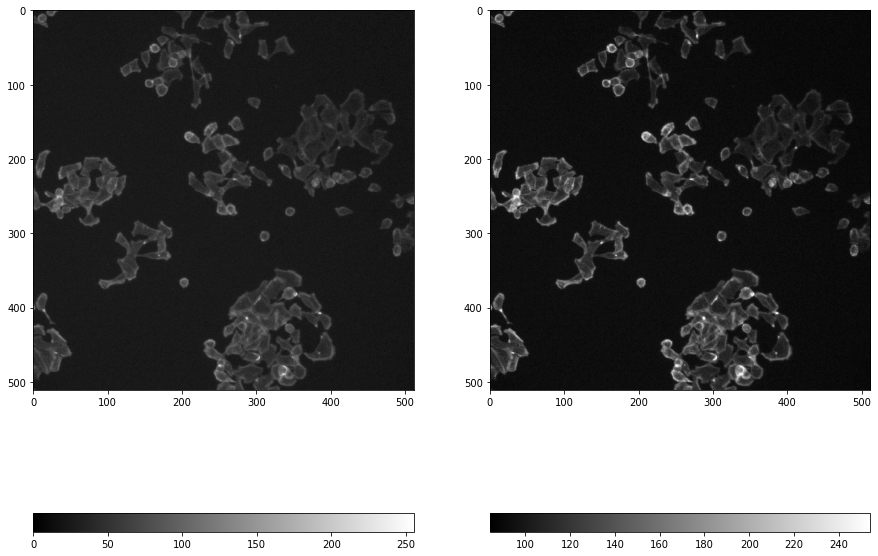

In [125]:
img_sigma_adj = exposure.adjust_sigmoid(img_cont, 0.1, 7)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(img_gamma_adj, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(img_sigma_adj, cmap='gray')
c = plt.colorbar(orientation='horizontal')

42.07788278966794
45.11639639324076
45.11639639324076


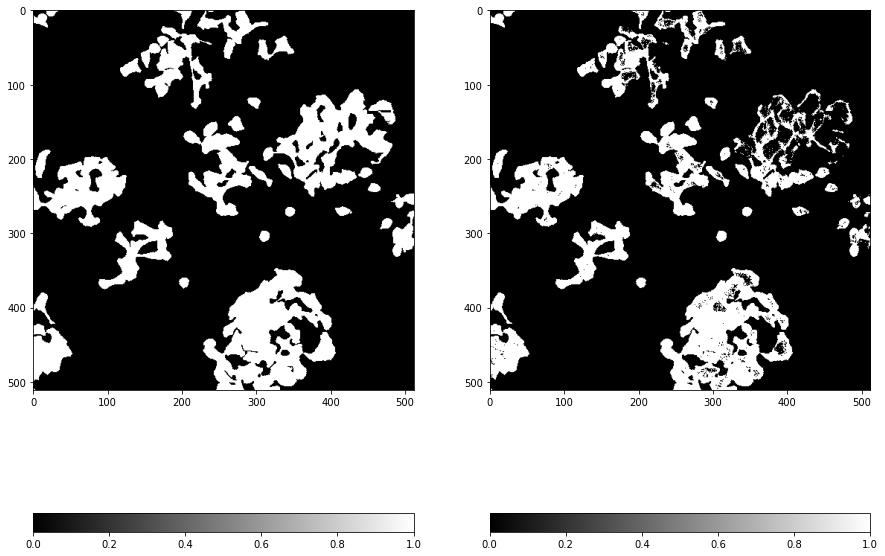

In [ ]:
# thresholding on the sigmoid adj image

im = io.imread('C:/Users/hamma/Desktop/Newcastle University/Data Science/Image Informatics/Project/cells/cytoplasm/IM/AS_09125_050116000001_A24f00d0_slice1_channel3.tif')
img_cont = exposure.rescale_intensity(im)

img_gamma_adj = exposure.adjust_gamma(img_cont, 0.6)

v = np.concatenate(img_gamma_adj)
t = v.mean()
d = np.inf
ds = 0.1
while d > ds:
  g1 = v[v>t]
  g2 = v[v<=t]
  m1 = g1.mean()
  m2 = g2.mean()
  tp = (m1 + m2)/2
  d = np.abs(t - tp)
  t = tp
  print(t)

imt = img_gamma_adj > t

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [ ]:
jaccard_score(imt, gt, average='micro')

0.838368723126172

46


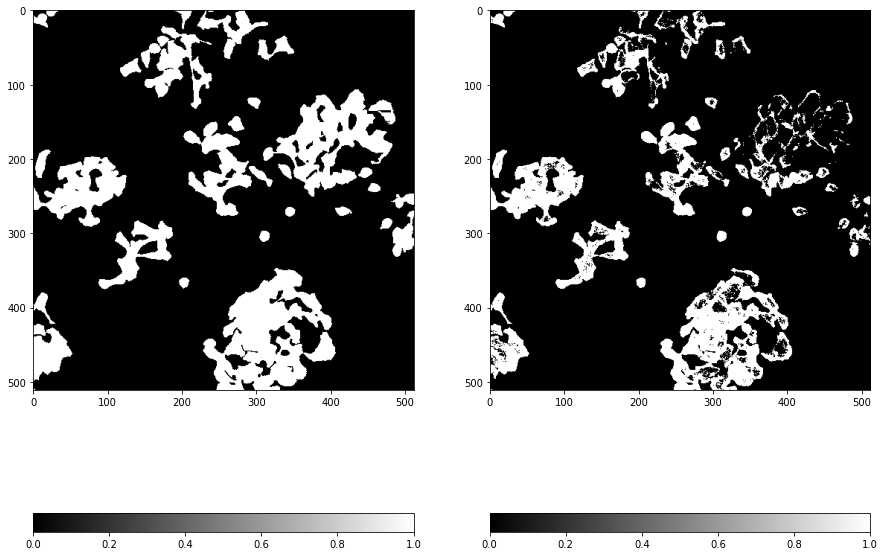

In [ ]:
# otsu thresholding on gamma adjusted image

t = threshold_otsu(img_gamma_adj)
print(t)
imt = img_gamma_adj > t

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [ ]:
jaccard_score(imt, gt, average='micro')

0.7131771179205009

standardizing images

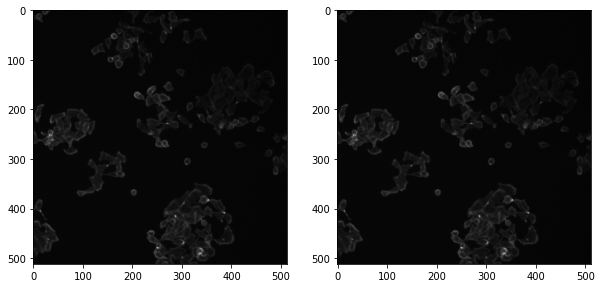

In [3]:
im_min_max = MinMaxScaler().fit_transform(im.reshape(-1, 1))
im_min_max = im_min_max.reshape(im.shape)
im_std = StandardScaler().fit_transform(im.reshape(-1, 1))
im_std = im_std.reshape(im.shape)

im_3 = im/255

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im_min_max.astype('float32'), cmap='gray')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_3, cmap='gray')

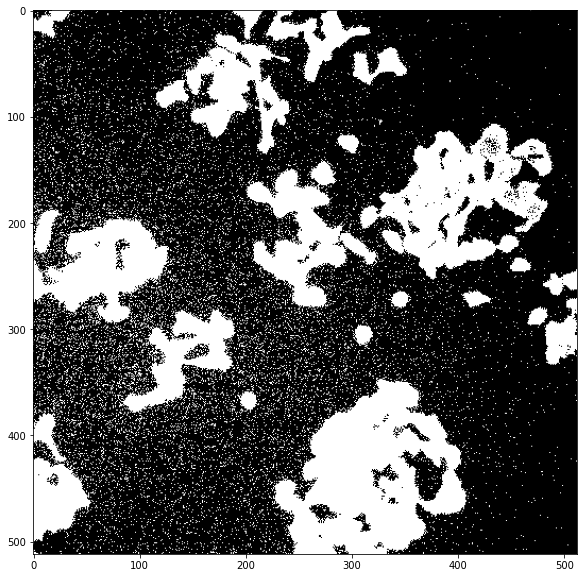

In [6]:
thresholds = threshold_multiotsu(im_std, classes=5)
regions = np.digitize(im_std, bins=thresholds)
regions[regions>0] = 1

plt.figure(figsize=(10, 10))
plt.imshow(regions, cmap='gray')

In [33]:
jaccard_score(rank.median(regions, footprint=morphology.disk(2)), gt, average='micro')

C:\Users\hamma\AppData\Local\Temp/ipykernel_17804/1653381095.py:1: UserWarning: Possible precision loss converting image of type int64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  jaccard_score(rank.median(regions, footprint=morphology.disk(2)), gt, average='micro')


0.8052361632090638